# Preparations
Load packages and data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
filepath = "/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv"
olympics_data = pd.read_csv(filepath, index_col="ID")

# Basic Dataset Exploration

Took a look at how the raw data looked like

In [3]:
olympics_data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Tabulated the no. of rows of data, and columns. There are 271,116 rows of athlete data, and 14 columns (excluding the index)
The data types also are "object" and "float64"

In [4]:
olympics_data.shape

(271116, 14)

In [5]:
olympics_data.dtypes

Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
           ...   
Season     object
City       object
Sport      object
Event      object
Medal      object
Length: 14, dtype: object

## Basic Information
* Count: Not all rows have complete data (namely: Age, Height, Weight, Medal). For Medal this could be reasonable construed as the athelete did not win any medals
* Name: Some people have same name, since unique count =/= count. As mentioned in the dataset description, ID column uniquely identifies athletes
* Sex: 2 types "M" or "F"
* Age: Average is 25 years old, youngest is 10 years old, and max is 97 years old. Upon checking it is due to certain sports like : Art Competitions, Shooting, Sailing that are more on precision / expression
* Weight: Average is 71kg, with min 25kg and max 214kg. This would probably be sports dependent
* Teams and NOCs are not the same. An NOC may have brought multiple Teams to compete (e.g. United States', 'Vesper Boat Club', 'New York Athletic Club 2-4'). This data does not seem useful
* Season: "Summer" or "Winter"
* Sport: A sport may have multiple events (e.g. Sport = Judo. Events = Judo Men's Extra-Lightweight", "Judo Men's Half-Middleweight",
       "Judo Men's Lightweight", "Judo Men's Heavyweight"...)

In [6]:
olympics_data.describe(include='all')

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116,271116,261642.000000,210945.00000,208241.000000,271116,271116,271116,271116.00000,271116,271116,271116,271116,39783
unique,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,NaN,NaN,25.556898,175.33897,70.702393,NaN,NaN,NaN,1978.37848,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,10.000000,127.00000,25.000000,NaN,NaN,NaN,1896.00000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,21.000000,168.00000,60.000000,NaN,NaN,NaN,1960.00000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,24.000000,175.00000,70.000000,NaN,NaN,NaN,1988.00000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,28.000000,183.00000,79.000000,NaN,NaN,NaN,2002.00000,NaN,NaN,NaN,NaN,NaN


An example of a NOC with multiple Teams. NOC USA has multiple teams (e.g. Angelita, Rush IV, Boston Archers).
These seem to be informal names that should not be usable in our analysis.

In [7]:
usa_noc = olympics_data.loc[olympics_data.NOC == 'USA']
usa_noc.Team.unique()

array(['United States', 'Vesper Boat Club', 'New York Athletic Club #2-4',
       'Mystery', 'United States-1', 'United States-2',
       'Mound City Rowing Club-2', 'La Salle Turnverein, Chicago',
       'Gallant', 'United States-3', "Christian Brothers' College-1",
       'Passaic Turnverein, Passaic', 'Bingo',
       'Chicago Athletic Association-2', 'Widgeon',
       'Davenport Turngemeinde, Davenport',
       'Norwegier Turnverein, Brooklyn', 'Turnverein Vorwrts, Cleveland',
       'New York Turnverein, New York', 'Angelita', 'United States-10',
       'St. Rose-2', 'New York Athletic Club-1',
       'St. Louis Southwest Turnverein #1-2', 'Chicago Archers',
       'Rush IV', 'Boston Archers', 'Western Rowing Club-3',
       'United States Golf Association-3',
       'Trans-Mississippi Golf Association-2', 'New York Athletic Club-4',
       'Complex II', 'United States-9', 'Babe', 'Cincinnati Archers',
       'United States-6', 'Western Golf Association-1',
       'New York Athleti

An example of a Sport (Judo) with multiple Events

In [8]:
filtered_judo = olympics_data.loc[olympics_data.Sport == 'Judo']
filtered_judo.Event.unique()

array(["Judo Men's Extra-Lightweight", "Judo Men's Half-Middleweight",
       "Judo Men's Lightweight", "Judo Men's Heavyweight",
       "Judo Women's Half-Middleweight", "Judo Women's Half-Heavyweight",
       "Judo Men's Open Class", "Judo Men's Middleweight",
       "Judo Men's Half-Lightweight", "Judo Men's Half-Heavyweight",
       "Judo Women's Half-Lightweight", "Judo Women's Heavyweight",
       "Judo Women's Extra-Lightweight", "Judo Women's Middleweight",
       "Judo Women's Lightweight"], dtype=object)

## Checking the validity of large "Age" data
* There are a number of participants above age 60
* I plotted a stripplot to see what Sports these elderly atheletes are engaged in: Art Competitions, Sailing, Equestrianism, Fencing, Archery, Roque
* As Art Competitions are no longer considered a sport in the Olympic games, I will remove them when doing further analysis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

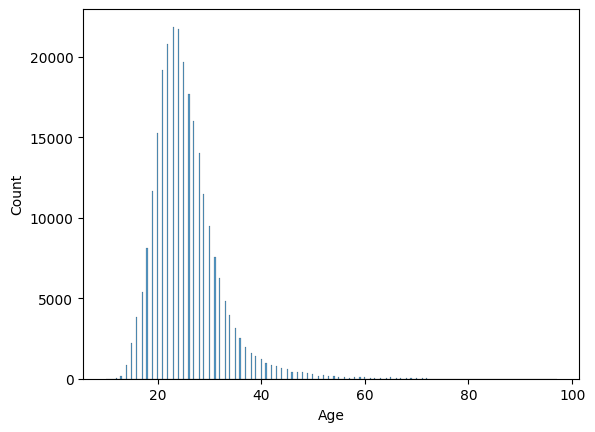

In [9]:
sns.histplot(olympics_data['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Art Competitions'),
  Text(1, 0, 'Shooting'),
  Text(2, 0, 'Sailing'),
  Text(3, 0, 'Equestrianism'),
  Text(4, 0, 'Fencing'),
  Text(5, 0, 'Archery'),
  Text(6, 0, 'Roque')])

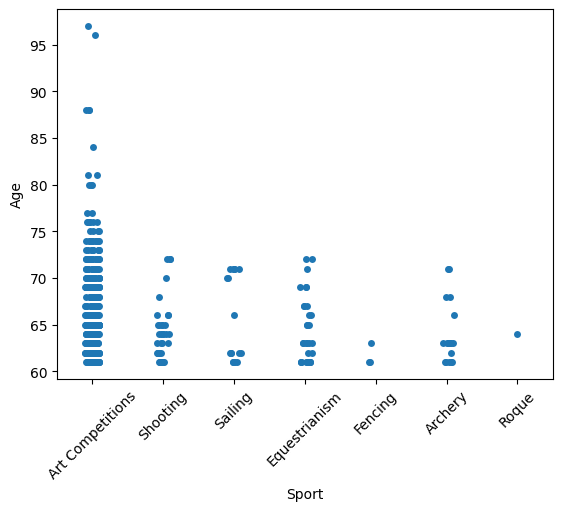

In [10]:
filtered_age_above_60 = olympics_data.loc[olympics_data.Age > 60]
sns.stripplot(x=filtered_age_above_60['Sport'], y=filtered_age_above_60['Age'])
plt.xticks(rotation=45)

## Recode Winter Olympics "Year" Value
Checking whether the Games name tallies with the Year
* There were only Summer Olympics from 1896 to 1920
* From the inaugural Winter Games in 1924 until 1992, winter and summer Games were held in the same year. 
* Since 1994, summer and winter Games have been held in staggered even years, with Summer being held in the 1st year of the Olympiad, and winter held in the 3rd year.
* When analysing the data, need to take note from 1992 onwards to recode year of the Winter Olympics to match the corresponding Summer Olympics (i.e. the same Olympiad period)

In [11]:
olympics_data.groupby('Games').Year.nunique()

Games
1896 Summer    1
1900 Summer    1
1904 Summer    1
1906 Summer    1
1908 Summer    1
              ..
2008 Summer    1
2010 Winter    1
2012 Summer    1
2014 Winter    1
2016 Summer    1
Name: Year, Length: 51, dtype: int64

In [12]:
def recode_winter_olympics_year(row):
    if row.Year in [1994, 1998, 2002, 2006, 2010, 2014]:
        row.Year += 2
    return row

olympics_data_recoded = olympics_data.apply(recode_winter_olympics_year, axis='columns')

Check that the recoding is done correctly

In [13]:
olympics_data_recoded[(olympics_data_recoded.Season == 'Winter') & (olympics_data_recoded.Year > 1992)].head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1996,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1996,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1996,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1996,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1996,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN


## Data Completeness of Age, Height, Weight
* Now that the "Year" is recoded to mean "Olympiad", I can analyse the dataset by Year
* Recall that the Age, Height and Weight columns having missing data (from Basic Information section)
* I compute the percentage data that has non NaN / null values by "Year" 

Insights
* Age data is missing to a lesser extent than height and weight data
* Data from 1960 is more complete. Therefore if we do analyse of athelete's height, weight, we should use 1960 onwards. 

In [14]:
age_completeness_by_year = olympics_data_recoded.groupby('Year')['Age'].apply(lambda col: col.notnull().sum() / len(col) * 100)
height_completeness_by_year = olympics_data_recoded.groupby('Year')['Height'].apply(lambda col: col.notnull().sum() / len(col) * 100)
weight_completeness_by_year = olympics_data_recoded.groupby('Year')['Weight'].apply(lambda col: col.notnull().sum() / len(col) * 100)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '% Data Completeness')

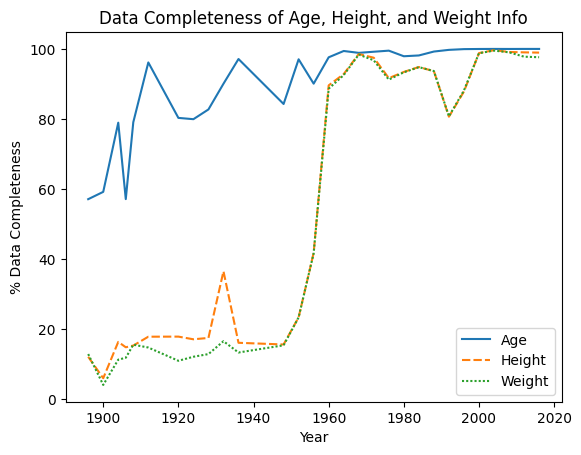

In [15]:
completeness_df = pd.concat([age_completeness_by_year, height_completeness_by_year, weight_completeness_by_year], axis=1)
sns.lineplot(data=completeness_df)
plt.title('Data Completeness of Age, Height, and Weight Info')
plt.xlabel('Year')
plt.ylabel('% Data Completeness')

# Female Participation in the Olympics
* Increased gradually from the 1940s
* Then rapidly from the 1980s onwards

In [16]:
grouped_by_sex_data = olympics_data_recoded.groupby(['Year', 'Sex']).size().reset_index(name='Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

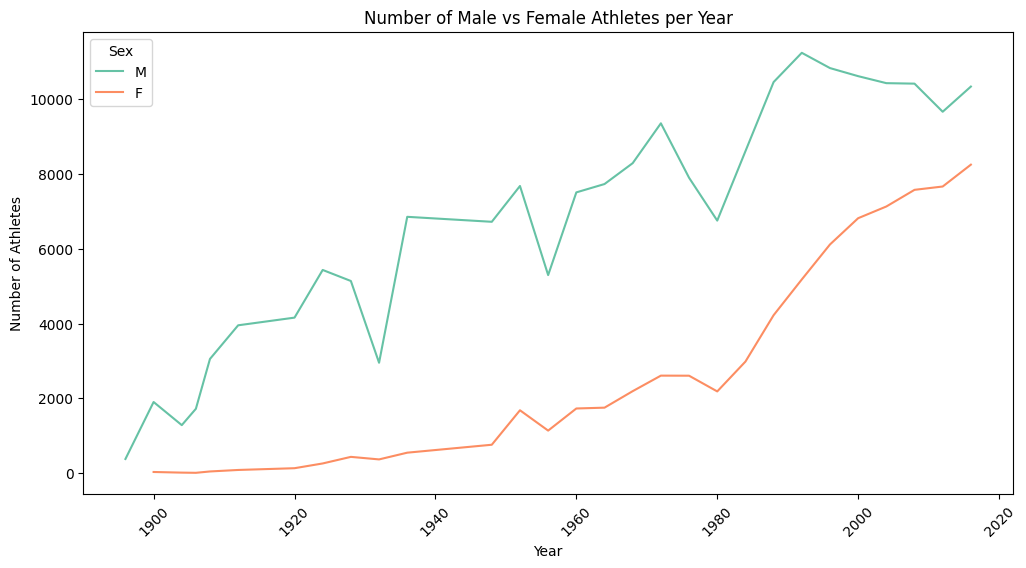

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_by_sex_data, x='Year', y='Count', hue='Sex', palette='Set2')
plt.title('Number of Male vs Female Athletes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.legend(title='Sex')

# Geographical Participation in the Olympics

# Countries that Dominate the Olympics
* I first tally the top 3 countries per Olympiad year based on the medal count (Doesnt matter whether Gold, Silver, Bronze)
* Then I plot medal count per year, organised by country (i.e. NOC) on a line chart
* It's a bit messy due to the changes in top 3 countries YoY

Insights
* Countries that dominates the Olympics are USA, Russia, Germany
* Some countries make it to the top 3 sporadically year on year

In [18]:
medal_counts = olympics_data_recoded.groupby(['Year', 'NOC']).size().reset_index(name='MedalCount')
top_3_countries_by_year = medal_counts.groupby('Year')[['Year', 'NOC', 'MedalCount']].apply(lambda df: df.nlargest(3, 'MedalCount')).reset_index(drop=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

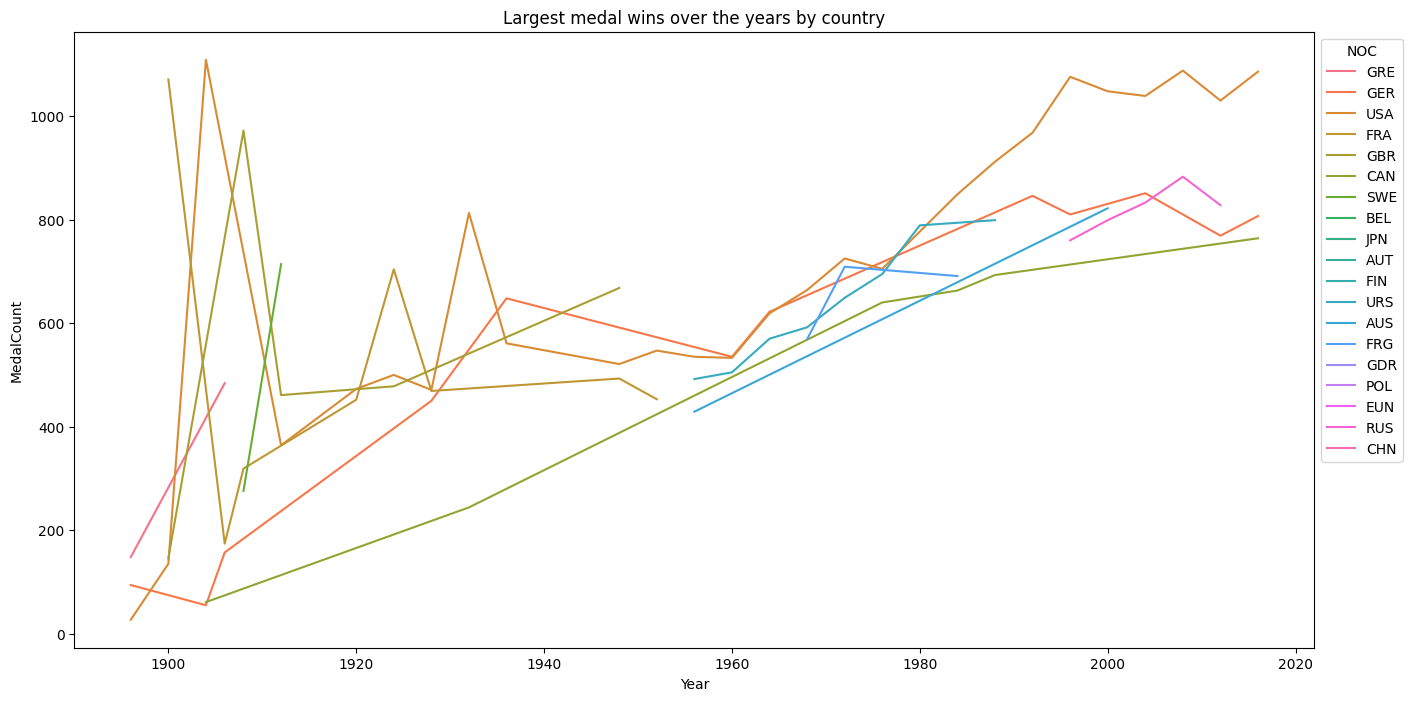

In [19]:
plt.figure(figsize=(16,8))
plt.title("Largest medal wins over the years by country")

medal_plot = sns.lineplot(data=top_3_countries_by_year, x='Year', y='MedalCount', hue='NOC')
sns.move_legend(medal_plot, "upper left", bbox_to_anchor=(1, 1))

# BMI by Sport
* the healthy BMI range is defined as 18.5 - 25.0
* The BMI distribution for males and females by sports were plotted on a box plot

In [20]:
# Calculate BMI of each athlete (convert height to metres)
olympics_data["BMI"] = olympics_data["Weight"] / (olympics_data["Height"] / 100)**2

# Grab only data after 1960 Olympics
olympics_data_after_1960_male = olympics_data[(olympics_data.Year > 1960) & (olympics_data.Sex == "M")]
olympics_data_after_1960_female = olympics_data[(olympics_data.Year > 1960) & (olympics_data.Sex == "F")]

In [21]:
# List Sports in alphabetical order
sorted_sports_array = sorted(olympics_data.Sport.unique())

## Male Athlete BMI
* Sports like bobsleigh, judo, rugby, curling, weighlifting and wrestling had close to at least 50% of athletes above the BMI
* This is due to the fact that these sports require much body building / strength

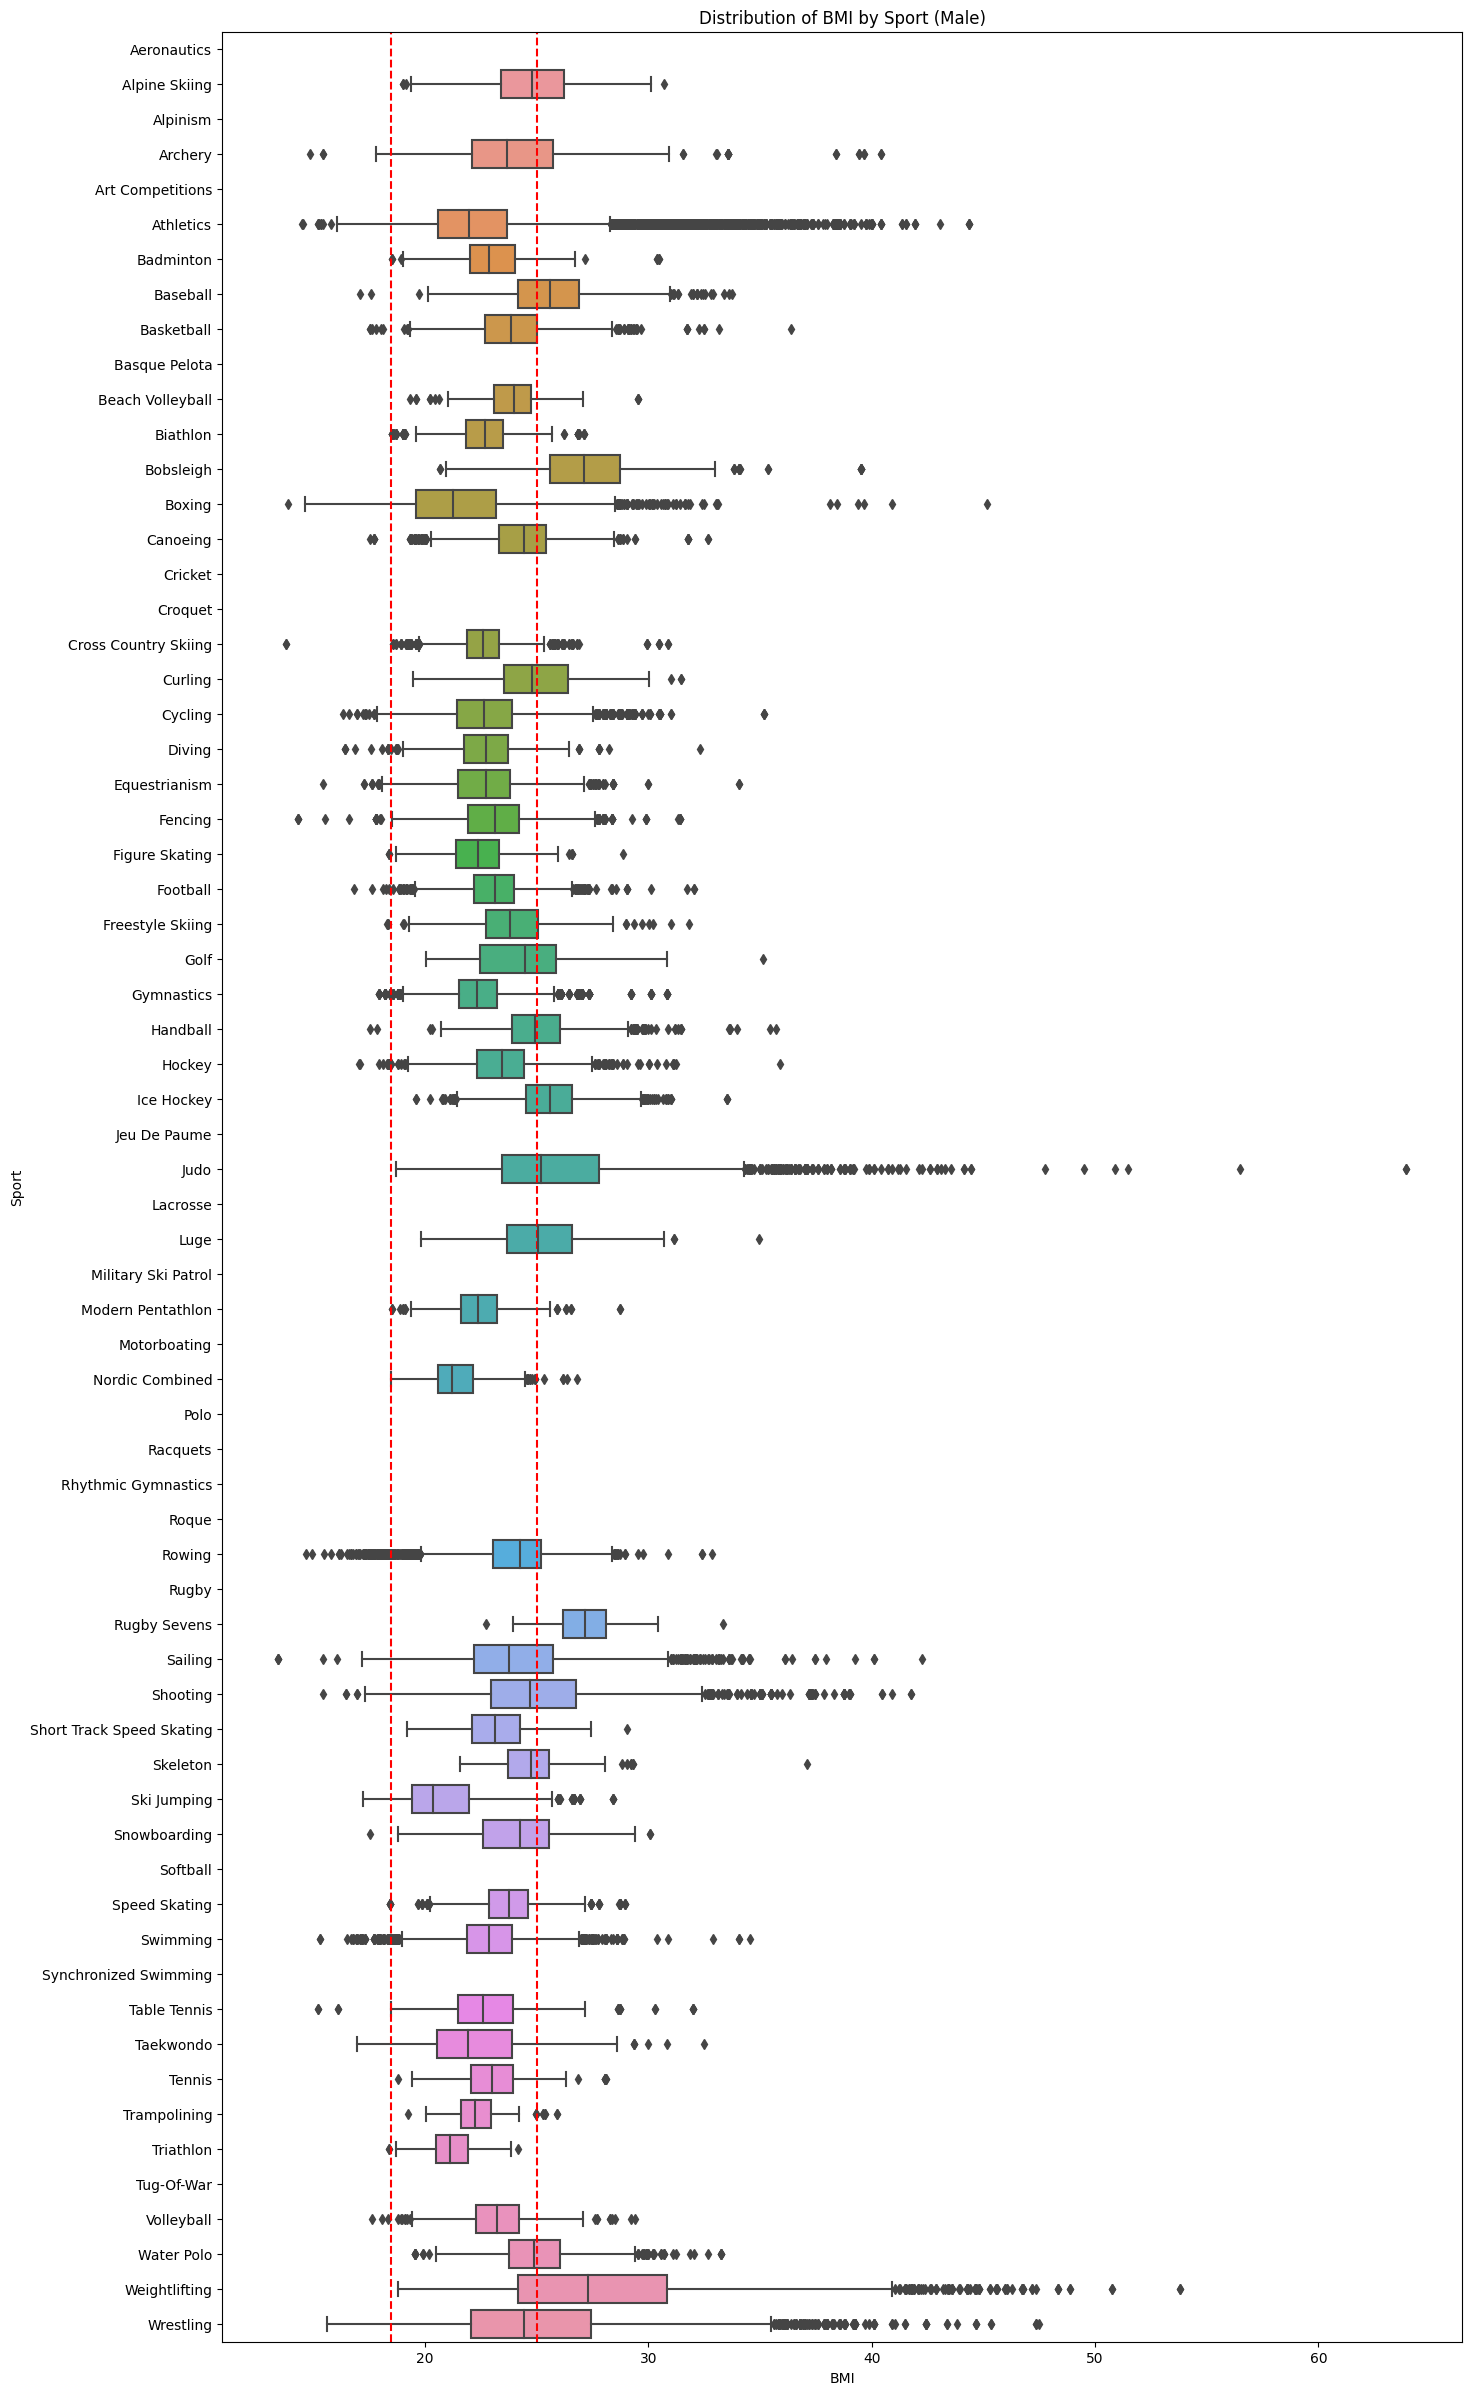

In [22]:
plt.figure(figsize=(16,30))
plt.title("Distribution of BMI by Sport (Male)")
ax = sns.boxplot(data=olympics_data_after_1960_male, x="BMI", y="Sport", order=sorted_sports_array)
ax.axvline(x=18.5, color='red', linestyle='--', label='Normal BMI')
ax.axvline(x=25.0, color='red', linestyle='--', label='Normal BMI')

## Female Athlete BMI
* Sports like bobsleigh and wrestling had the some athletes above the BMI
* However, in general, female athletes seem to fall within the normal BMI even for sports that require bulk (e.g. Rugby)

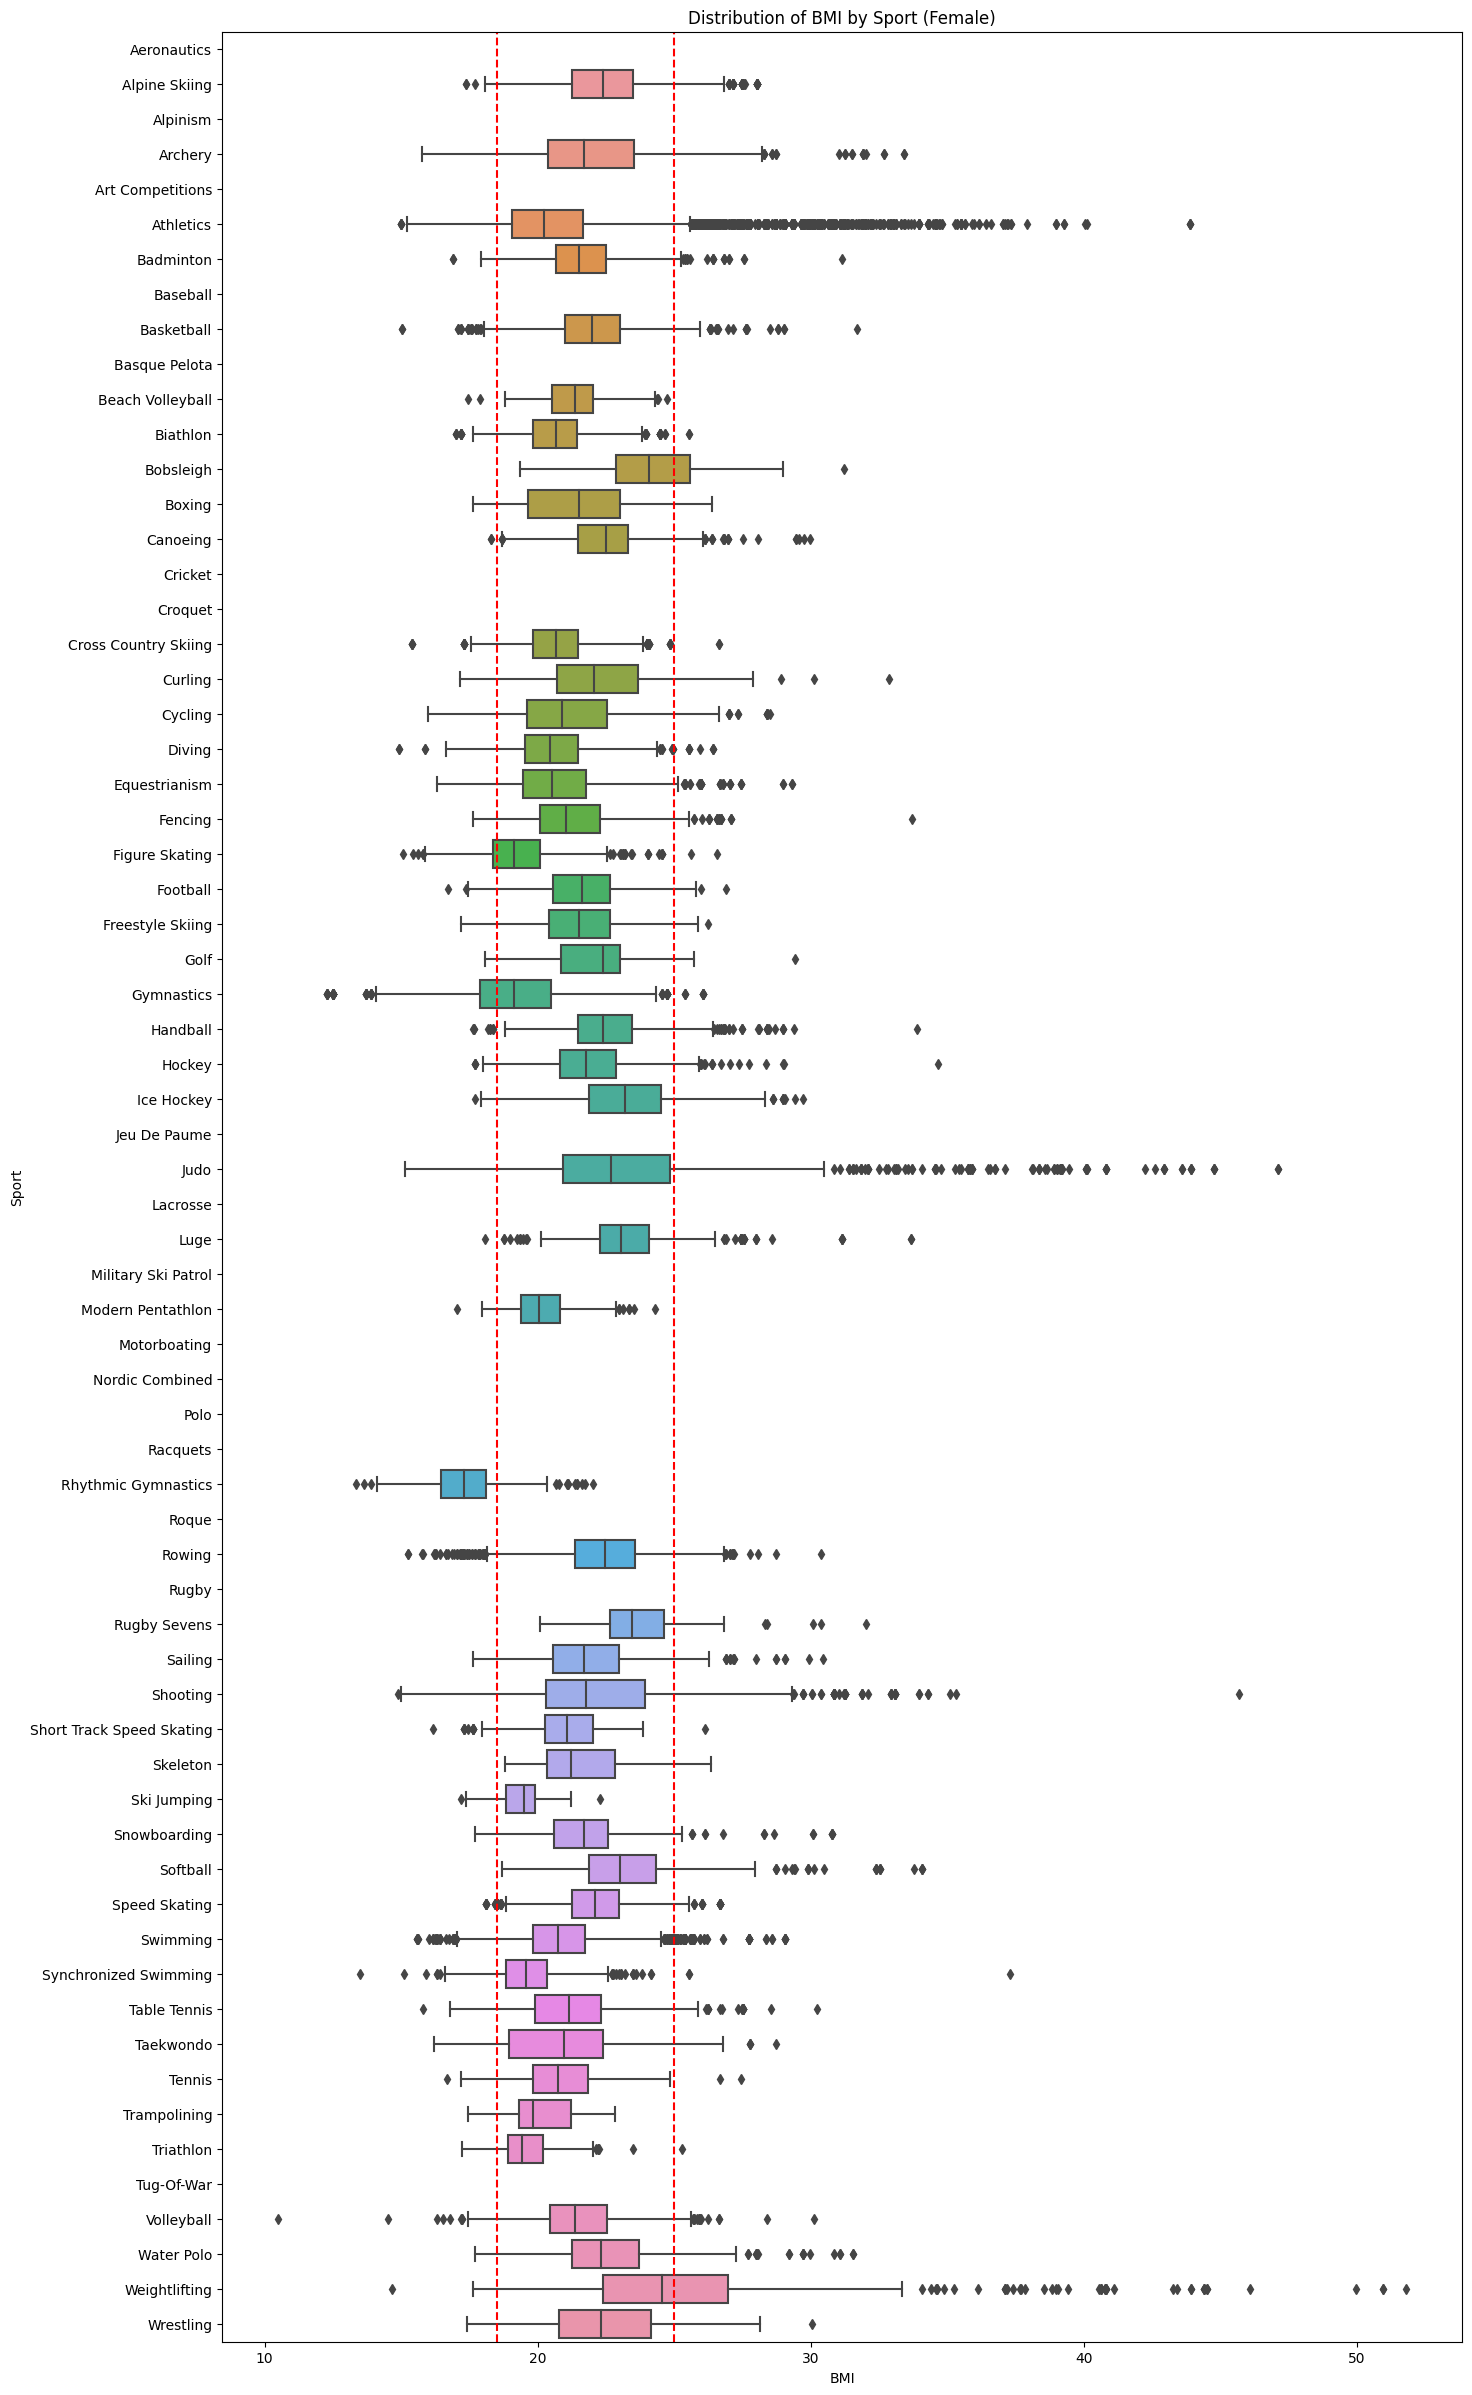

In [23]:
plt.figure(figsize=(16,30))
plt.title("Distribution of BMI by Sport (Female)")
ax = sns.boxplot(data=olympics_data_after_1960_female, x="BMI", y="Sport", order=sorted_sports_array)
ax.axvline(x=18.5, color='red', linestyle='--', label='Normal BMI')
ax.axvline(x=25.0, color='red', linestyle='--', label='Normal BMI')